The Beta distribution is a statistical model that is really good at describing things that have a probability between 0 and 1. Imagine it like a flexible tool for understanding chances or percentages in various scenarios. Its shape can change a lot: it can look like a hill, a plateau, or even a valley, depending on two parameters, often called alpha and beta.

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initial priors
alpha_prior = 1
beta_prior = 1

In [3]:
# Sample outcomes: 1 represents a hit (success), and 0 represents a miss (failure)
# For example, these could represent the outcome of detecting cyber threats (1 for successful detection, 0 for a miss)
samples = [1, 0, 1, 1, 0]

In [4]:
# Update priors based on samples
alpha_posterior = alpha_prior + sum(samples)
beta_posterior = beta_prior + len(samples) - sum(samples)

In [5]:
# Values over which we'll calculate the Beta distribution
x = np.linspace(0, 1, 1000)

In [6]:
# Calculate the probability density function (PDF) for the Beta distribution
pdf = beta.pdf(x, alpha_posterior, beta_posterior)

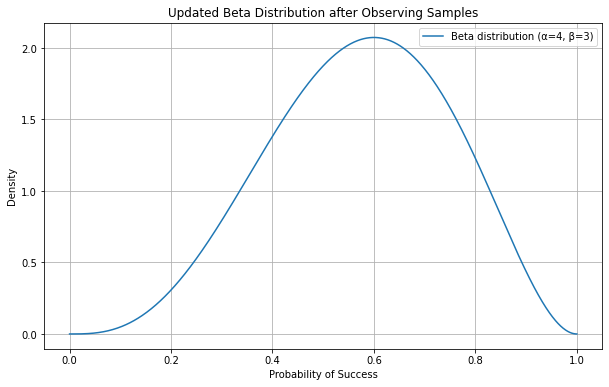

In [7]:
# Visualize the outcome
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Beta distribution (α={alpha_posterior}, β={beta_posterior})')
plt.title('Updated Beta Distribution after Observing Samples')
plt.xlabel('Probability of Success')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

I am huge fan of Seaborn, which is a Python visualization library based on matplotlib, offering a high-level interface for drawing attractive and informative statistical graphics. Seaborn doesn't have a direct method for plotting probability density functions like the Beta distribution. However, we can still use it to style our plots and use its lineplot function for plotting lines. 

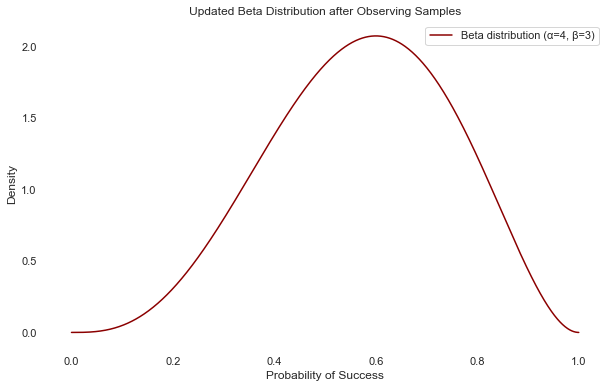

In [8]:
# Use Seaborn to style the plots without gridlines
sns.set(style="white")
# Visualize the outcome using Seaborn's lineplot for the plotting and matplotlib's plt for the figure management
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=pdf, label=f'Beta distribution (α={alpha_posterior}, β={beta_posterior})', color='darkred')
sns.despine(left=True, bottom=True)
plt.title('Updated Beta Distribution after Observing Samples')
plt.xlabel('Probability of Success')
plt.ylabel('Density')
plt.legend()
plt.show()

### Laplace's Rule of Succession

Laplace's Rule of Succession is a classical approach to estimating probabilities for sequences of events, especially when trying to predict the next outcome based on past observations. It's essentially an early form of Bayesian inference. When integrating this rule with the Beta distribution, it provides a neat way to update beliefs about probabilities with new evidence.

In simple terms, if you're trying to predict the probability of an event (like flipping a heads with a coin whose bias you don't know), Laplace's Rule suggests starting with a prior belief that assumes every outcome is equally likely. Then, for every observed event, you update this belief. Specifically, if you have seen an event occur s times (successes) and not occur f times (failures) out of n trials, Laplace's Rule would suggest estimating the probability of the event occurring next as:

P = (s+1) / (s+f+2)

This formula comes from assuming a uniform prior distribution (in Bayesian terms, a Beta distribution with α=1 and 
β=1, because we initially assume all outcomes are equally likely without any prior data). Each observed success adds one to the numerator, and each possible outcome (success or failure in this case) adds one to the denominator.

When integrating with the Beta distribution, the initial priors (α=1 and β=1) are like saying "before I see any data, I assume there's an equal chance for success or failure." After observing s successes and f failures, the posterior distribution becomes Beta(α+s, β+f), which reflects updated beliefs about the probability of success based on observed data.

In [9]:
# Number of observed successes and failures
successes = 0
failures = 10

In [10]:
# Laplace's Rule of Succession
alpha_laplace = 1 + successes  # +1 represents the prior belief of one success
beta_laplace = 1 + failures    # +1 represents the prior belief of one failure

In [11]:
# Generate a range of probabilities from 0 to 1
probabilities = np.linspace(0, 1, 1000)

In [12]:
# Calculate the Beta PDF with updated beliefs
pdf = beta.pdf(probabilities, alpha_laplace, beta_laplace)

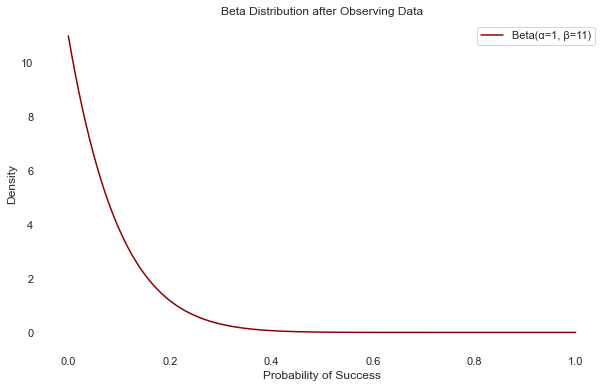

In [13]:
# Use Seaborn to style the plots without gridlines
sns.set(style="white")
# Visualize the outcome using Seaborn's lineplot for the plotting and matplotlib's plt for the figure management
plt.figure(figsize=(10, 6))
sns.lineplot(x=probabilities, y=pdf, label=f'Beta(α={alpha_laplace}, β={beta_laplace})', color='darkred')
sns.despine(left=True, bottom=True)
plt.title('Beta Distribution after Observing Data')
plt.xlabel('Probability of Success')
plt.ylabel('Density')
plt.legend()
plt.show()

In [29]:
# Estimating the next probability of success
estimated_probability = (successes + 1) / (successes + failures + 2)
print(f"Estimated Probability of Success: {estimated_probability:.2f}")

Estimated Probability of Success: 0.08


### Capture-Recapture

In [15]:
# Simulate capture-recapture
# Let's say we have a total population we want to estimate (e.g., assets, vulnerabilities)
total_population = 1000  # Total number of unique assets/vulnerabilities

In [16]:
# First capture
M = np.random.randint(100, 300)  # Number of items captured in the first round

In [17]:
# Recapture
C = np.random.randint(100, 300)  # Total items captured in the second round

In [18]:
# Assume some of the recaptured items were also captured in the first round
R = np.random.randint(20, min(M, C))  # Overlap in captures

In [19]:
# Estimate total population using capture-recapture formula
N_estimated = (M * C) / R

In [20]:
print(f"First capture (M): {M}")
print(f"Second capture (C), with recapture (R): ({C}), ({R})")
print(f"Estimated total population (N): {N_estimated:.2f}")

First capture (M): 214
Second capture (C), with recapture (R): (242), (127)
Estimated total population (N): 407.78


In [21]:
# Applying the Beta distribution to model our uncertainty about this proportion
# Initial belief (prior) about the proportion of the population captured after the first round
alpha_prior = 1  # Hypothetical initial successful captures (Laplace's Rule)
beta_prior = 1  # Hypothetical initial misses (Laplace's Rule)

In [22]:
# Update beliefs (posterior) after capture-recapture
alpha_posterior = alpha_prior + R  # Updating with the number of recaptures
beta_posterior = beta_prior + (C - R) + (M - R)  # Updating with the number of unique misses

In [23]:
# Plot the posterior Beta distribution
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, alpha_posterior, beta_posterior)

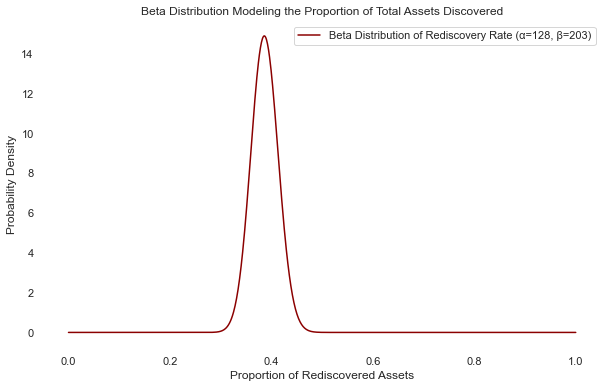

In [24]:
# Using Seaborn for visualization
sns.set(style="white")
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, label=f'Beta Distribution of Rediscovery Rate (α={alpha_posterior}, β={beta_posterior})', color='darkred')
sns.despine(left=True, bottom=True)
plt.title('Beta Distribution Modeling the Proportion of Total Assets Discovered')
plt.xlabel('Proportion of Rediscovered Assets')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [25]:
# Interpretation
print(f"Updated belief in proportion captured: mean = {alpha_posterior/(alpha_posterior+beta_posterior):.4f}, variance = {alpha_posterior*beta_posterior/((alpha_posterior+beta_posterior)**2*(alpha_posterior+beta_posterior+1)):.4f}")

Updated belief in proportion captured: mean = 0.3867, variance = 0.0007


The Beta distribution in this context helps illustrate the degree of certainty about how thoroughly assets have been identified. A narrower, more peaked distribution suggests higher certainty, while a wider distribution indicates greater uncertainty.

This is of course a fake example, but still interesting to analyze in terms of how we interpret the results. When we estimate the total population to be 538 using the capture-recapture method but know the actual population to be 1000, it indicates that the estimation is significantly off from the true value. The discrepancy could arise from several factors not accounted for in the basic capture-recapture model, such as:

1. Non-homogeneous Capture Probabilities: The assumption that every member of the population has an equal chance of being captured or recaptured might not hold true. Some assets (or whatever the population represents) could be more or less likely to be detected due to their characteristics or behaviors.
2. Closed Population Assumption: The basic model assumes no changes in the population size due to new additions, losses, or migrations during the period between captures. This assumption might be violated in dynamic populations.
3. Perfect Detection of Marks: The model assumes that every recaptured individual that was previously marked is correctly identified as such. In reality, marks could be missed or misidentified.

When we observe a narrow and peaked Beta distribution suggesting high confidence (based on the proportion of recaptured individuals), this confidence pertains to the internal consistency of the data under the model's assumptions rather than the accuracy of the absolute estimate against the true population size. The Beta distribution is modeling the uncertainty about the proportion of the total assets discovered based on the recapture data, assuming the capture-recapture estimation method accurately reflects the true scenario, which, in this case, it does not.

So, how do we reconcile the discrepancy:

1. Model Limitations: Recognize the limitations of the capture-recapture model and the conditions under which it provides reliable estimates. The method works best under certain conditions that might not always apply in real-world scenarios, especially complex ones like estimating total assets in a company.
2. Data and Assumptions Review: Review the data and assumptions made during the estimation process. For instance, consider whether the two samples (captures) were truly independent, whether some assets have a higher or lower probability of being captured, and whether the population could have changed size between samples.
3. Adjusting the Model: Depending on the situation, we might need to adjust the capture-recapture model to account for variable capture probabilities, population dynamics, or other complexities. Advanced statistical models and methods are available for these purposes.
4. Beta Distribution Interpretation: Understand that the Beta distribution's confidence is about the consistency of the recapture rate under the model's assumptions. If the foundational model (capture-recapture in this case) misestimates the population size due to its assumptions not matching reality, the Beta distribution reflects confidence in an inaccurate estimate.

In summary, a narrow and peaked Beta distribution indicates high confidence within the framework of the given model and its assumptions. When there's a significant discrepancy between the estimated and actual population sizes, it's a cue to reevaluate those assumptions, the data, or potentially use more sophisticated models that can account for the complexities of the population being studied.

Let's illustrate the Beta distribution and how it changes with different α and β values, including an example to represent the effect of applying Laplace's Rule of Succession (α=β=2, starting from a uniform prior of α=β=1 and adding 1 success and 1 failure).

In [26]:
# Define alpha and beta parameters for different scenarios, including Laplace's Rule of Succession
params = [
    (1, 1, 'Uniform (α=1, β=1)'),
    (0.5, 0.5, 'U-shaped (α=0.5, β=0.5)'),
    (5, 1, 'Skewed towards 1 (α=5, β=1)'),
    (2, 3, 'Skewed towards 0 (α=2, β=3)'),
    (2, 2, "Laplace's Rule (α=2, β=2) - Symmetrical"),
]

In [27]:
x = np.linspace(0, 1, 1000)

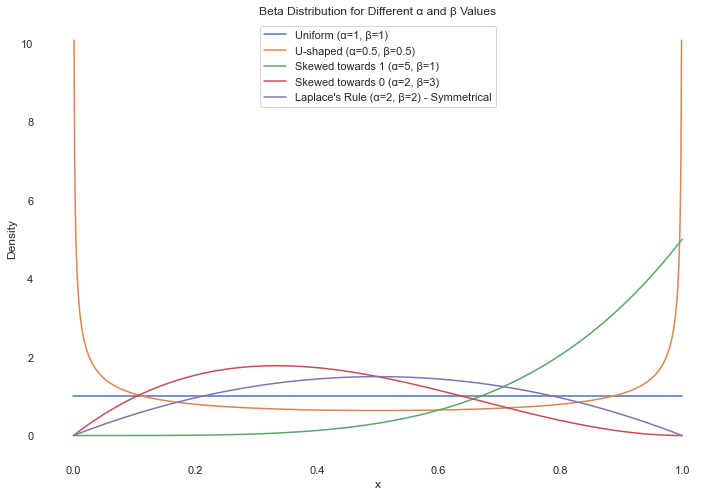

In [28]:
# Using Seaborn for visualization
sns.set(style="white")
plt.figure(figsize=(12, 8))

for alpha, beta_val, label in params:  
    y = beta.pdf(x, alpha, beta_val)  
#     plt.plot(x, y, label=label)
    sns.lineplot(x=x, y=y, label=label)
sns.despine(left=True, bottom=True)

plt.title('Beta Distribution for Different α and β Values')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
# plt.grid(True)
plt.show()

How to Interpret This Visualization:
1. Uniform (α=1, β=1): Represents total uncertainty about the probability of success. Every probability between 0 and 1 is equally likely.
2. U-shaped (α=0.5, β=0.5): Indicates high variability or uncertainty, suggesting outcomes tend to be extreme (either very low or very high probability of success).
3. Skewed towards 1 (α=5, β=1): Suggests a higher likelihood of success; the process or event being modeled is more likely to succeed than fail.
4. Skewed towards 0 (α=2, β=3): Indicates a lower likelihood of success, with outcomes more frequently resulting in failure.
5. Laplace's Rule (α=2, β=2): By starting with a uniform prior and adding one hypothetical observation for both success and failure, this symmetrical distribution suggests a balanced view but with a tendency towards moderate probabilities (around 0.5) rather than extremes, reflecting slight uncertainty but leaning towards an equal chance of success or failure.

This code and the resulting plot offer a clear visual understanding of how the Beta distribution can model different beliefs or knowledge states about the probability of an event, based on past data or prior assumptions, including the conservative adjustment provided by Laplace's Rule of Succession.